# final project - KICKSTARTER

**What is Kickstarter?**

Kickstarter is a funding platform for creative projects. Everything from film, games, and music to art, design, and technology. Kickstarter is full of ambitious, innovative, and imaginative projects that are brought to life through the direct support of others.

Every project creator sets their project's funding goal and deadline. If people like the project, they can pledge money to make it happen. If the project succeeds in reaching its funding goal, all backers' credit cards are charged when time expires. Funding on Kickstarter is all-or-nothing. If the project falls short of its funding goal, no one is charged.

**Objective**

Goal of this analysis it to be able to predict whether or not a project will receive it's goal funds.

## import libraries

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import datetime
import math
import time

# scipy libraries
from scipy import stats
from scipy.stats.mstats import winsorize

# statsmodels libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# sklearn libraries
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

# balancing libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# language libraries
from textblob import TextBlob
import langid
import yake
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


## import data

In [131]:
files = os.listdir('Data')
files

['dataset_my-task-1_2021-10-31_18-52-00-573.xlsx',
 'dataset_my-task-1_2021-10-31_22-32-25-255.xlsx',
 'dataset_my-task-1_2021-11-01_17-24-18-413.xlsx',
 'dataset_my-task-1_2021-11-02_17-57-06-970.xlsx',
 'dataset_my-task-2_2021-10-31_18-52-00-523.xlsx',
 'dataset_my-task-2_2021-10-31_22-37-00-186.xlsx',
 'dataset_my-task-2_2021-11-01_17-24-30-852.xlsx',
 'dataset_my-task-2_2021-11-02_17-57-06-586.xlsx',
 'dataset_my-task-3_2021-10-31_18-52-00-929.xlsx',
 'dataset_my-task-3_2021-10-31_22-32-19-791.xlsx',
 'dataset_my-task-3_2021-11-01_17-24-21-989.xlsx',
 'dataset_my-task-3_2021-11-02_17-57-09-804.xlsx',
 'dataset_my-task-4_2021-10-31_18-51-58-474.xlsx',
 'dataset_my-task-4_2021-10-31_22-32-30-946.xlsx',
 'dataset_my-task-4_2021-11-01_17-24-24-455.xlsx',
 'dataset_my-task-4_2021-11-02_17-57-08-310.xlsx',
 'dataset_my-task_2021-10-31_18-51-58-693.xlsx',
 'dataset_my-task_2021-10-31_22-32-41-350.xlsx',
 'dataset_my-task_2021-11-01_17-24-19-839.xlsx',
 'kickstarter_all_enddate_30102021.xl

In [132]:
files = os.listdir('Data')

df = pd.DataFrame()

path = os.getcwd() + "\\Data" + "\\"

for i in files:
    data = pd.read_excel(path + i)
    df = df.append(data)

## first review and clean data

### review

In [133]:
print("This dataset contains {} rows and {} columns".format(*df.shape))

This dataset contains 29472 rows and 47 columns


In [134]:
df.sample(5)

,backers_count,blurb,categoryId,categoryName,categorySlug,converted_pledged_amount,country,country_displayable_name,created_at,created_at_formatted,...,state,state_changed_at,static_usd_rate,title,url,usd_exchange_rate,usd_pledged,usd_type,is_backing,is_starred
1279,449,A mythical woman with strange powers and a dar...,250,Comic Books,comics/comic books,9139,GB,the United Kingdom,1619086264,"Thu, 22 Apr 2021 10:11:04 +0000",...,successful,1623137369,1.387473,Rusalka | Part 1,https://www.kickstarter.com/projects/pigeongir...,1.416052,8954.747580,international,NaN,NaN
1723,29,A hard enamel pin collection of the Genshin Im...,22,Illustration,art/illustration,1484,DE,Germany,1612671141,"Sun, 07 Feb 2021 04:12:21 +0000",...,successful,1618941602,1.194650,Heroes of Teyvat - Genshin Impact Hard Enamel ...,https://www.kickstarter.com/projects/kiosaurus...,1.206671,1469.419943,domestic,NaN,NaN
1322,89,A timeless and rugged explorer watch,28,Product Design,design/product design,52622,DK,Denmark,1613986545,"Mon, 22 Feb 2021 09:35:45 +0000",...,successful,1619953200,0.161007,Pacific Explorer By Coast Watch Company,https://www.kickstarter.com/projects/coastwatc...,0.161648,52413.686763,domestic,NaN,NaN
1710,125,High-quality vegan leather Ita Bag Crossbody P...,262,Accessories,fashion/accessories,9092,CA,Canada,1590612072,"Wed, 27 May 2020 20:41:12 +0000",...,successful,1593637246,0.726267,Kusari Ita Bag Crossbody,https://www.kickstarter.com/projects/daymare/k...,0.736595,8965.244540,domestic,NaN,NaN
1918,108,Appreciate the beauty of wood. Challenge yours...,28,Product Design,design/product design,5879,HK,Hong Kong,1610353049,"Mon, 11 Jan 2021 08:17:29 +0000",...,successful,1613133163,0.128960,Walli - The Challenging Wooden Puzzle and Home...,https://www.kickstarter.com/projects/woodas/wa...,0.128981,5878.909093,domestic,NaN,NaN


### review column names

In [135]:
df.columns

Index(['backers_count', 'blurb', 'categoryId', 'categoryName', 'categorySlug',
       'converted_pledged_amount', 'country', 'country_displayable_name',
       'created_at', 'created_at_formatted', 'creatorAvatar', 'creatorId',
       'creatorName', 'creatorUrl', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline', 'description',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_starrable',
       'launched_at', 'launched_at_formatted', 'link', 'locationId',
       'locationName', 'name', 'photo', 'pledged', 'pubDate', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'title', 'url', 'usd_exchange_rate', 'usd_pledged',
       'usd_type', 'is_backing', 'is_starred'],
      dtype='object')

no cleaning of column names required

### Drop Duplicates

In [136]:
before_dropping_duplicates = df.shape

In [137]:
df = df.drop_duplicates()

In [138]:
after_dropping_duplicates = df.shape

In [139]:
# duplicate rows that have been dropped ... 

before_dropping_duplicates[0] - after_dropping_duplicates[0]

2539

### drop duplicate projects with different values

#### check for duplicate projects

In [140]:
df.duplicated(subset='id', keep='first').sum()

8820

#### review duplicates

In [141]:
df[df.duplicated(subset=['id'],keep=False)].sort_values(by=['id'])

,backers_count,blurb,categoryId,categoryName,categorySlug,converted_pledged_amount,country,country_displayable_name,created_at,created_at_formatted,...,state,state_changed_at,static_usd_rate,title,url,usd_exchange_rate,usd_pledged,usd_type,is_backing,is_starred
1976,7798,Reuse and recycle plastic bottles of all kinds...,28,Product Design,design/product design,400276,FR,France,1454599119,"Thu, 04 Feb 2016 15:18:39 +0000",...,successful,1461409167,1.111204,Plastic Bottle Cutter,https://www.kickstarter.com/projects/910418035...,1.12246,396262.032441,domestic,NaN,NaN
1976,7798,Reuse and recycle plastic bottles of all kinds...,28,Product Design,design/product design,400276,FR,France,1454599119,"Thu, 04 Feb 2016 15:18:39 +0000",...,successful,1461409167,1.111204,Plastic Bottle Cutter,https://www.kickstarter.com/projects/910418035...,1.12246,396262.032441,international,NaN,NaN
213,78,A fun hackable handheld gaming console & learn...,52,Hardware,technology/hardware,8054,GB,the United Kingdom,1634240494,"Thu, 14 Oct 2021 19:41:34 +0000",...,live,1635346827,1.376580,8BitCADE Level UP - Fun Hackable Game Console ...,https://www.kickstarter.com/projects/jackdaly/...,1.37947,8038.070698,domestic,NaN,NaN
208,78,A fun hackable handheld gaming console & learn...,52,Hardware,technology/hardware,8054,GB,the United Kingdom,1634240494,"Thu, 14 Oct 2021 19:41:34 +0000",...,live,1635346827,1.376580,8BitCADE Level UP - Fun Hackable Game Console ...,https://www.kickstarter.com/projects/jackdaly/...,1.37947,8038.070698,domestic,NaN,NaN
1818,109,A 78 card tarot deck with a little bit of ever...,22,Illustration,art/illustration,13082,US,the United States,1612369415,"Wed, 03 Feb 2021 16:23:35 +0000",...,successful,1618113600,1.000000,The Fools Tarot,https://www.kickstarter.com/projects/nyahouse/...,1.00000,13082.000000,international,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,114,A collection of Lewd Art and Comics about Mons...,22,Illustration,art/illustration,2334,GB,the United Kingdom,1630222933,"Sun, 29 Aug 2021 07:42:13 +0000",...,live,1630571977,1.373808,Monster Layer,https://www.kickstarter.com/projects/marcodrag...,1.36850,2343.715663,domestic,NaN,NaN
20,114,A collection of Lewd Art and Comics about Mons...,22,Illustration,art/illustration,2340,GB,the United Kingdom,1630222933,"Sun, 29 Aug 2021 07:42:13 +0000",...,live,1630571977,1.373808,Monster Layer,https://www.kickstarter.com/projects/marcodrag...,1.36850,2349.210893,domestic,NaN,NaN
325,98,A collection of Lewd Art and Comics about Mons...,22,Illustration,art/illustration,2027,GB,the United Kingdom,1630222933,"Sun, 29 Aug 2021 07:42:13 +0000",...,live,1630571977,1.373808,Monster Layer,https://www.kickstarter.com/projects/marcodrag...,1.37947,2019.497084,domestic,NaN,NaN
888,38,"An indie pilot about two best friends,Mugshot ...",290,Video Art,art/video art,1537,US,the United States,1622493756,"Mon, 31 May 2021 20:42:36 +0000",...,successful,1628103600,1.000000,Mugshot&Pollen (Animated Pilot),https://www.kickstarter.com/projects/mnpcartoo...,1.00000,1537.000000,domestic,NaN,NaN


#### drop double listing of projects

In [142]:
df = (df.sort_values(by=['id', 'converted_pledged_amount'], ascending=False).drop_duplicates(subset='id', keep= 'first').reset_index(drop=True))

#### set id as index and review shape after drop

In [143]:
df = df.set_index('id')

In [144]:
df.shape

(18113, 46)

### review dtypes

In [145]:
### Review DTypes

df.dtypes

# boolean columns death_event, smoking, sex, high_blood_pressure, diabetes, anaemia
# df = df.astype({'death_event':'boolean', 'sex':'boolean', 'smoking':'boolean', 'high_blood_pressure':'boolean','diabetes':'boolean','anaemia':'boolean','age':'int64'})


#df = df.astype({'polarity':'int64', 'subjectivity':'int64'})

df.dtypes

backers_count                 int64
blurb                        object
categoryId                    int64
categoryName                 object
categorySlug                 object
converted_pledged_amount      int64
country                      object
country_displayable_name     object
created_at                    int64
created_at_formatted         object
creatorAvatar                object
creatorId                     int64
creatorName                  object
creatorUrl                   object
currency                     object
currency_symbol              object
currency_trailing_code         bool
current_currency             object
deadline                      int64
description                  object
disable_communication          bool
fx_rate                     float64
goal                        float64
is_starrable                   bool
launched_at                   int64
launched_at_formatted        object
link                         object
locationId                  

to review

### Null Values

In [146]:
df.isna().any()

backers_count               False
blurb                        True
categoryId                  False
categoryName                False
categorySlug                False
converted_pledged_amount    False
country                     False
country_displayable_name    False
created_at                  False
created_at_formatted        False
creatorAvatar               False
creatorId                   False
creatorName                 False
creatorUrl                  False
currency                    False
currency_symbol             False
currency_trailing_code      False
current_currency            False
deadline                    False
description                  True
disable_communication       False
fx_rate                     False
goal                        False
is_starrable                False
launched_at                 False
launched_at_formatted       False
link                        False
locationId                  False
locationName                False
name          

No null values present in this dataset

### Data Values

In [147]:
for col in data:
    print(data[col].value_counts(), '\n')

3199     1
7713     1
44949    1
81567    1
83193    1
78471    1
88887    1
27168    1
68929    1
62642    1
66673    1
19264    1
Name: backers_count, dtype: int64 

A full-featured tripod in a truly portable form.                                                                                           1
The COOLEST is a portable party disguised as a cooler, bringing blended drinks, music and fun to any outdoor occasion.                     1
Pebble is a customizable watch. Download new watchfaces, use sports and fitness apps, get notifications from your phone.                   1
Expandable capacity (3.6-25kWh) | Power almost anything (3.6-7.2kW) | Home battery ecosystem                                               1
A revolutionary table that evolves over a lifetime. Innovative, yet affordable, with magnetic accessories. Crafted without compromise.     1
Two affordable, heart rate-enabled smartwatches and a hackable, 3G wearable for phone-free running with GPS, music, and Amazon 

### convert timestamps

#### created_at

In [148]:
date = []
time = []
weekday = []

for i in df['created_at']:
    date.append(datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d'))
    time.append(datetime.datetime.fromtimestamp(int(i)).strftime('%H:%M:%S'))
    weekday.append(datetime.datetime.fromtimestamp(int(i)).strftime('%A'))

df['created_date'] = date
df['created_time'] = time
df['created_weekday'] = weekday

#### launched_at

In [149]:
date = []
time = []
weekday = []

for i in df['launched_at']:
    date.append(datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d'))
    time.append(datetime.datetime.fromtimestamp(int(i)).strftime('%H:%M:%S'))
    weekday.append(datetime.datetime.fromtimestamp(int(i)).strftime('%A'))

df['launched_date'] = date
df['launched_time'] = time
df['launched_weekday'] = weekday

#### deadline

In [150]:
date = []
time = []
weekday = []

for i in df['deadline']:
    date.append(datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d'))
    time.append(datetime.datetime.fromtimestamp(int(i)).strftime('%H:%M:%S'))
    weekday.append(datetime.datetime.fromtimestamp(int(i)).strftime('%A'))

df['deadline_date'] = date
df['deadline_time'] = time
df['deadline_weekday'] = weekday

#### add project duration column

In [151]:
# time between deadline and launched

project_duration = []

for i,j in zip(df.deadline, df.launched_at):
    a = ((i - j) / 60 / 60 / 24)
    project_duration.append(a)
    
df['project_duration'] = project_duration

### goal reached column

In [152]:
conditions = [
    ((df['goal'] - df['converted_pledged_amount']) > 0),
    ((df['goal'] - df['converted_pledged_amount']) <= 0)
]

values = ['no', 'yes']

df['goal_reached'] = np.select(conditions, values)

In [153]:
df['goal_reached'].value_counts()

yes    15551
no      2562
Name: goal_reached, dtype: int64

In [154]:
df['state'].value_counts()

successful    15424
live           2689
Name: state, dtype: int64

In [156]:
data_crosstab = pd.crosstab(df['state'], df['goal_reached'], margins = False)
data_crosstab

goal_reached,no,yes
state,,
live,1613,1076
successful,949,14475


### add goal reached % column

In [157]:
funded_rate = []

for i,j in zip(df.goal, df.converted_pledged_amount):
    a = (j / i)
    funded_rate.append(a)

df['funded_rate'] = funded_rate

### target column

In [158]:
target = []

for i in df['funded_rate']:
    if i >= 1:
        target.append(True)
    else:
        target.append(False)

df['target'] = target     

In [159]:
df.sample(5)

,backers_count,blurb,categoryId,categoryName,categorySlug,converted_pledged_amount,country,country_displayable_name,created_at,created_at_formatted,...,launched_date,launched_time,launched_weekday,deadline_date,deadline_time,deadline_weekday,project_duration,goal_reached,funded_rate,target
id,,,,,,,,,,,,,,,,,,,,,
178689638,62,A set of FFXIV locale inspired stamp enamel pins~,21,Digital Art,art/digital art,2537,US,the United States,1611622467,"Tue, 26 Jan 2021 00:54:27 +0000",...,2021-01-30,22:07:46,Saturday,2021-03-01,22:07:46,Monday,30.000000,yes,8.456667,True
799240508,105,"A suction window planter, with drainage holes ...",28,Product Design,design/product design,4426,CA,Canada,1611619280,"Tue, 26 Jan 2021 00:01:20 +0000",...,2021-03-20,00:44:20,Saturday,2021-04-19,01:44:20,Monday,30.000000,yes,1.106500,True
854726870,25,Help Celebrate DANCE IQUAIL's Fifth Anniversar...,6,Dance,dance,5000,US,the United States,1364252080,"Mon, 25 Mar 2013 22:54:40 +0000",...,2013-04-11,14:42:48,Thursday,2013-05-11,14:42:48,Saturday,30.000000,yes,1.250000,True
1326491607,34,"Snuggly Smart Heated Blankets, Throws & Mattre...",16,Technology,technology,12697,US,the United States,1630497535,"Wed, 01 Sep 2021 11:58:55 +0000",...,2021-10-26,14:32:55,Tuesday,2021-12-10,14:32:55,Friday,45.041667,yes,1.269700,True
997150715,481,This project is about the gaming table - Megan...,34,Tabletop Games,games/tabletop games,664168,GB,the United Kingdom,1585142998,"Wed, 25 Mar 2020 13:29:58 +0000",...,2020-05-05,16:17:33,Tuesday,2020-06-04,16:17:33,Thursday,30.000000,yes,22.138933,True


### get information from language

#### add language column

In [160]:
language = []

for i in df['description']:
    if isinstance(i, float):
        language.append(0)
    else:
        a = langid.classify(i)
        language.append(a[0])        
    
df['language'] = language

In [161]:
df.shape

(18113, 60)

In [162]:
df['language'].value_counts()

en    17253
es      211
fr      190
de       87
it       62
da       39
sv       30
nl       27
id       22
ja       20
no       15
zh       15
ca       13
fi       12
pl       12
ro       10
la       10
sl        8
mt        6
et        6
nn        4
eo        4
ms        4
af        3
ku        3
pt        3
lt        3
hu        3
cs        3
mg        3
ga        3
lb        3
gl        2
tl        2
br        2
jv        2
tr        2
nb        2
he        2
cy        2
rw        2
sk        1
sw        1
am        1
ht        1
xh        1
ru        1
lo        1
0         1
Name: language, dtype: int64

#### add polarity and subjectivity column

In [163]:
polarity = []
subjectivity = []

for i,j in zip(df.name, df.converted_pledged_amount):
    if isinstance(i, float) or isinstance(j, float):
        polarity.append(0)
        subjectivity.append(0)
    else:
        a = TextBlob(i)
        polarity.append(round(a.polarity,2))
        subjectivity.append(round(a.subjectivity,2))

df['polarity'] = polarity
df['subjectivity'] = subjectivity

In [164]:
df.shape

(18113, 62)

#### add length for columns name and description

In [165]:
length_name = []
length_description = []

for i,j in zip(df.name, df.description):
    if isinstance(i, float) or isinstance(j, float):
        length_name.append(0)
        length_description.append(0)
    else:    
        length_name.append(len(i))
        length_description.append(len(j))
    
df['length_name'] = length_name
df['length_description'] = length_description

In [166]:
df.shape

(18113, 64)

#### keyword extractions with yake

In [ ]:
for i in 

In [82]:
kw_extractor = yake.KeywordExtractor()

In [83]:
text = 'How to check if a number is an int or float in Python'

In [84]:
language = 'en'

In [85]:
max_ngram_size = 1

In [86]:
deduplication_threshold = 0.9

In [95]:
numOfKeywords = 3

In [96]:
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)

In [97]:
keywords = custom_kw_extractor.extract_keywords(text)

In [98]:
for kw in keywords:
    print(kw)

('Python', 0.08596317751626563)
('check', 0.29736558256021506)
('number', 0.29736558256021506)


### drop columns

In [167]:
to_drop = ['blurb', 
           'categoryId', 
           'country_displayable_name', 
           'created_at',
           'created_at_formatted',
           'creatorAvatar', 
           'creatorId', 
           'creatorName', 
           'creatorUrl', 
           'currency_symbol',
           'deadline',
           'launched_at',
           'launched_at_formatted',
           'link', 
           'locationId', 
           'pubDate',
           'photo',
           'state_changed_at',
           'slug', 
           'static_usd_rate',
           'usd_exchange_rate',
           'usd_pledged',
           'usd_type',
           'title',
           'url']

In [168]:
df = df.drop(to_drop, axis=1)

In [169]:
df.shape

(18113, 39)

In [170]:
df.columns

Index(['backers_count', 'categoryName', 'categorySlug',
       'converted_pledged_amount', 'country', 'currency',
       'currency_trailing_code', 'current_currency', 'description',
       'disable_communication', 'fx_rate', 'goal', 'is_starrable',
       'locationName', 'name', 'pledged', 'spotlight', 'staff_pick', 'state',
       'is_backing', 'is_starred', 'created_date', 'created_time',
       'created_weekday', 'launched_date', 'launched_time', 'launched_weekday',
       'deadline_date', 'deadline_time', 'deadline_weekday',
       'project_duration', 'goal_reached', 'funded_rate', 'target', 'language',
       'polarity', 'subjectivity', 'length_name', 'length_description'],
      dtype='object')

In [171]:
df.sample(5)

,backers_count,categoryName,categorySlug,converted_pledged_amount,country,currency,currency_trailing_code,current_currency,description,disable_communication,...,deadline_weekday,project_duration,goal_reached,funded_rate,target,language,polarity,subjectivity,length_name,length_description
id,,,,,,,,,,,,,,,,,,,,,
1447919830,119,Accessories,fashion/accessories,3718,US,USD,True,USD,by ZenMoon,False,...,Saturday,30.041667,yes,1.239333,True,en,0.00,0.0,19,10
1001020080,21,Dance,dance,1205,US,USD,True,USD,The studio is doing well. We have students reg...,False,...,Sunday,5.000000,yes,1.004167,True,en,0.00,0.0,21,128
807185912,7576,Animation,film & video/animation,441900,US,USD,True,USD,Mobsters. Zombies. Killer robots. Demon priest...,False,...,Sunday,30.041667,yes,1.104750,True,en,-0.59,0.8,50,129
1680282534,885,Hardware,technology/hardware,536436,AU,AUD,True,USD,The affordable entry-level laser cutter / engr...,False,...,Saturday,35.000000,yes,11.920800,True,en,0.00,0.0,50,86
2052117989,47,Anthologies,comics/anthologies,1645,US,USD,True,USD,The Samhain Shade returns with a second collec...,False,...,Saturday,30.000000,yes,1.096667,True,en,0.00,0.0,25,134


### only keep successful projects (drop live)

In [172]:
df = df.loc[df['state'] == 'successful']

In [173]:
df.sample(5)

,backers_count,categoryName,categorySlug,converted_pledged_amount,country,currency,currency_trailing_code,current_currency,description,disable_communication,...,deadline_weekday,project_duration,goal_reached,funded_rate,target,language,polarity,subjectivity,length_name,length_description
id,,,,,,,,,,,,,,,,,,,,,
157005965,133,Accessories,fashion/accessories,4354,US,USD,True,USD,A video-game adventure inspired parody in coll...,False,...,Thursday,30.000000,yes,8.708000,True,en,0.0,0.0,43,77
593437587,37,Product Design,design/product design,12560,AU,AUD,True,USD,Quality Australian handmade kitchen knives. Th...,False,...,Thursday,30.000000,yes,1.068936,True,en,0.0,0.0,22,118
1418154858,2281,Television,film & video/television,486950,US,USD,True,USD,Fans saved the show and now fans are creating ...,False,...,Thursday,30.041667,yes,1.947800,True,en,0.0,0.0,56,116
496428193,240,Accessories,fashion/accessories,23966,US,USD,True,USD,Kawaii compact everyday wear Ita bag for all o...,False,...,Saturday,20.999988,yes,15.977333,True,en,-0.2,0.6,34,77
1441622864,4,Crafts,crafts,100,US,USD,True,USD,Hello! I am looking to learn how to make keych...,False,...,Saturday,3.000000,yes,1.000000,True,en,0.0,0.0,20,135


### split numeric and categorical data

In [196]:
# final shape of cleaned data

df.shape

(15424, 39)

## Explore Cleaned Data

### projects per weekday

In [194]:
df.groupby(["target"])["funded_rate"].mean().sort_values(ascending=False)

target
True     12.040659
False     0.475672
Name: funded_rate, dtype: float64

In [110]:
df.columns

Index(['backers_count', 'categoryName', 'categorySlug',
       'converted_pledged_amount', 'country', 'currency',
       'currency_trailing_code', 'current_currency', 'description',
       'disable_communication', 'fx_rate', 'goal', 'is_starrable',
       'locationName', 'name', 'pledged', 'spotlight', 'staff_pick', 'state',
       'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'usd_type',
       'is_backing', 'is_starred', 'created_date', 'created_time',
       'created_weekday', 'launched_date', 'launched_time', 'launched_weekday',
       'deadline_date', 'deadline_time', 'deadline_weekday',
       'project_duration', 'goal_reached', 'target', 'funded_rate', 'language',
       'polarity', 'subjectivity', 'length_name', 'length_description'],
      dtype='object')

### projects per category

### Check for Correlation

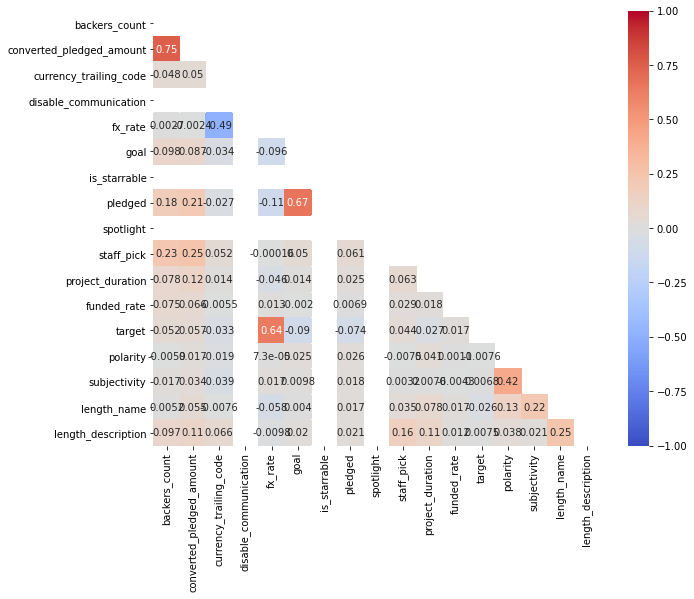

In [175]:
#round(df.corr()['death_event'].sort_values(ascending=False),2)

# create correlation heatmap 

mask = np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

plt.show()

## data imbalances

### check whether data is imbalanced

True     14475
False      949
Name: target, dtype: int64

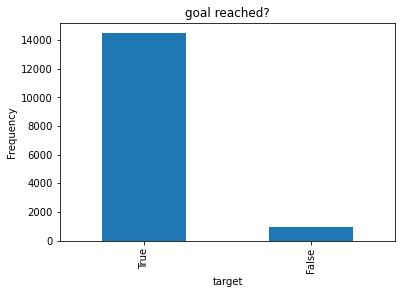

In [176]:
pd.value_counts(df['target']).plot.bar()
plt.title('goal reached?')
plt.xlabel('target')
plt.ylabel('Frequency')
df['target'].value_counts()

**YES** our data is imbalanced, as we have 13.324 'no' values and 2.313 'yes' values

### deal with imbalances

In [177]:
# upscaling

In [190]:
rake_nltk_var = Rake()

text = """Kickstarter is a funding platform for creative projects. Everything from film, games, and music to art, design, and technology. Kickstarter is full of ambitious, innovative, and imaginative projects that are brought to life through the direct support of others."""

rake_nltk_var.extract_keywords_from_text(text)

keyword_extracted = rake_nltk_var.get_ranked_phrases()

print(keyword_extracted)

['imaginative projects', 'funding platform', 'direct support', 'creative projects', 'technology', 'others', 'music', 'life', 'kickstarter', 'kickstarter', 'innovative', 'games', 'full', 'film', 'everything', 'design', 'brought', 'art', 'ambitious']
